<a href="https://colab.research.google.com/github/GiovaniValdrighi/Bolsonaro_Tweets/blob/sentiment/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de sentimentos

Para obter informações dos tweets coletados iremos efetuar uma anális de sentimentos no tweets, isto é, para cada um dos tweets desejamos indentificar se o texto possui um sentimento positivo ou negativo associado, e além disso, também seremos capazes de avaliar se o texto representa uma opinião ou um fato. Para a análise de sentimentos utilizaremos a biblioteca __Textblob__. No entanto, uma das limitações muitas vezes encontradas para fazer processamento de textos é que a maior parte das ferramentas dão suporte apenas para o inglês, por esse motivo, iremos traduzir cada um dos tweets para inglês utilizando a biblioteca __Googletrans__.

In [1]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 952kB 4.5MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 71kB 4.9MB/s 
     |████████████████████████████████| 102kB 5.7MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=a07d4f832a36f653c276f42a68e776bb8dd15587a8a60f6dfad1a048990f0413
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=81f5a974b5cc2cb8664e1931f650d2f4e70abf7c08288569b4d321a717123e97
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


## Tradução e análise de sentimentos

In [111]:
import textblob
import pandas as pd
from googletrans import Translator
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import numpy as np

In [24]:
df = pd.read_csv("preprocessed_tweets.csv", sep = "~").drop(columns = ["Unnamed: 0"])
trans = lambda tw : translator.translate(tw).text
full_text_en = []
for i in tqdm(range(0, 12000, 1000)):
    translator = Translator()
    for tw in df.full_text[i:i+1000]:
        full_text_en.append(trans(tw))
for tw in df.full_text[12000:]:
    full_text_en.append(trans(tw))
df["full_text_en"] = full_text_en
pol = lambda x : textblob.TextBlob(x).polarity
sub = lambda x : textblob.TextBlob(x).subjectivity
df['polarity'] = df.full_text_en.apply(pol)
df['subjectivity'] = df.full_text_en.apply(sub)

100%|██████████| 12/12 [50:16<00:00, 251.41s/it]


In [37]:
df.to_pickle("data/tweets/sentiment_analysis.pkl")

Com os dados já traduzidos, vamos observar alguns tweets em português e em inglês para verificar se as traduções são satisfatórias.

In [25]:
for i in range(5):
    print("Português:")
    print(df.full_text[i])
    print()
    print("Inglês")
    print("\t" + df.full_text_en[i])
    print()

Português:
-Edifício Joelma/SP, 1974.

-Sgt CASSANIGA salta de helicóptero da FAB no terraço do edifício em chamas para salvar vidas, em uma das maiores tragédias na história do Brasil.

. Link no YouTube: https://t.co/JW8q4qN3a8 https://t.co/3Ulw3G96D5

Inglês
	- Joelma / SP Building, 1974.

-Sgt CASSANIGA jumps from the FAB helicopter on the terrace of the burning building to save lives, in one of the greatest tragedies in the history of Brazil.

. Link on YouTube: https://t.co/JW8q4qN3a8 https://t.co/3Ulw3G96D5

Português:
- Água para quem tem sede.
- Liberdade para um povo. 
- Brasil acima de tudo, Deus acima de todos!
- BOM DIA.

. YouTube: https://t.co/eS5aHQfMXu https://t.co/UERpWo4NbR

Inglês
	- Water for those who are thirsty.
- Freedom for a people.
- Brazil above all, God above all!
- GOOD MORNING.

. YouTube: https://t.co/eS5aHQfMXu https://t.co/UERpWo4NbR

Português:
@tarcisiogdf @MInfraestrutura 🤝🇧🇷, Ministro!

Inglês
	@tarcisiogdf @MInfraestrutura 🤝🇧🇷, Minister!

Portugu

## Visualização dos resultados

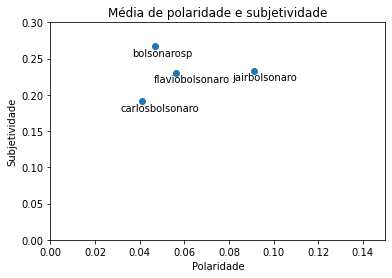

In [57]:
plot_data = df.groupby(by = "name").mean()
plt.scatter(plot_data.polarity, plot_data.subjectivity)
plt.title("Média de polaridade e subjetividade")
for row in range(len(plot_data)):
    plt.annotate(plot_data.index[row], (plot_data.polarity[row] - 0.01, plot_data.subjectivity[row] - 0.013))
plt.xlabel("Polaridade")
plt.ylabel("Subjetividade")
plt.xlim([0, 0.15])
plt.ylim([0, 0.3])
plt.show()

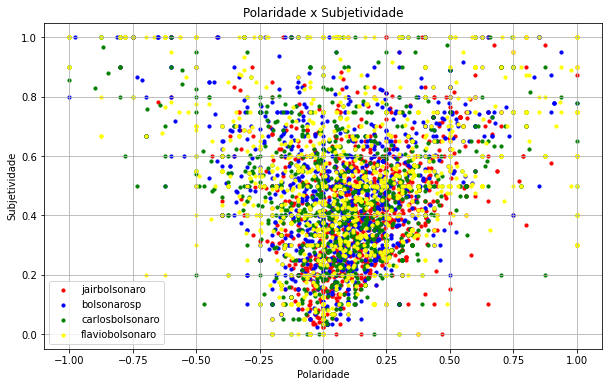

In [70]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
ax.set_title("Polaridade x Subjetividade")
for (name, color) in [("jairbolsonaro", "red"), ("bolsonarosp", "blue"),
             ("carlosbolsonaro", "green"), ("flaviobolsonaro", "yellow")]:
    ax.scatter(df[df.name == name].polarity, df[df.name == name].subjectivity, c = color, label = name, s = 10)
ax.set_xlabel("Polaridade")
ax.set_ylabel("Subjetividade")
plt.legend()
plt.grid()
plt.show()

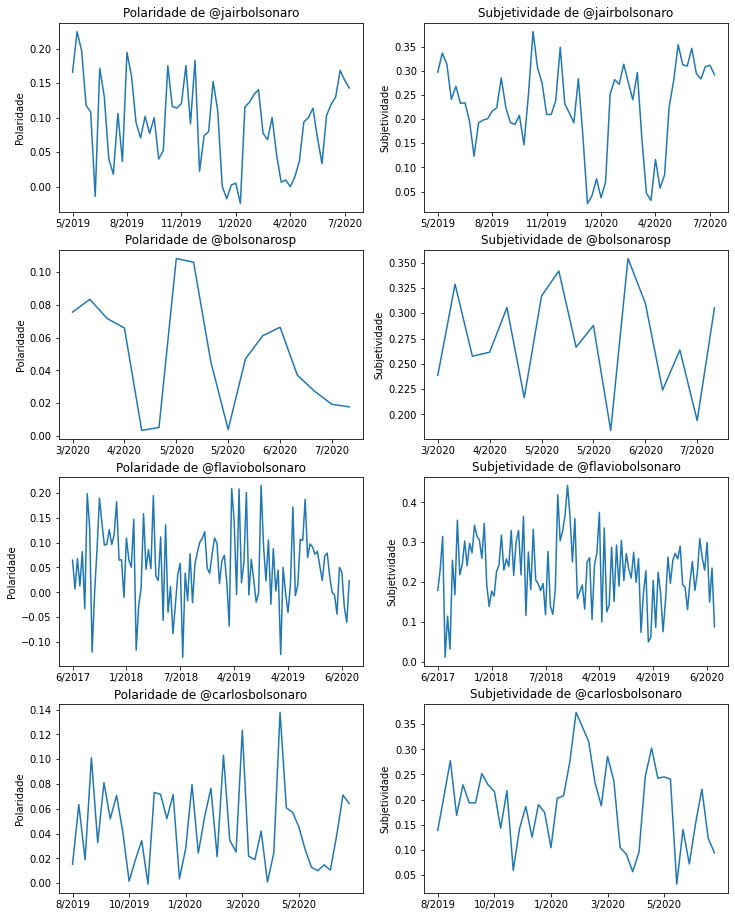

In [130]:
plot_data = df.groupby(by = ["name","year", "month", "day"]).mean()
plot_data.reset_index(inplace = True)
fig, axis = plt.subplots(nrows = 4, ncols = 2)
fig.set_figheight(16)
fig.set_figwidth(12)
name = ['jairbolsonaro', 'bolsonarosp', 'flaviobolsonaro', 'carlosbolsonaro']
for (i, row) in enumerate(axis):
    row_data = plot_data[plot_data.name == name[i]].rolling(7).mean().iloc[::7, :]
    row_data.dropna(inplace = True)
    date_ticks = row_data.month.map(lambda x : str(int(np.floor(x)))) + "/" + row_data.year.map(lambda x : str(int(x)))
    n_ticks = int(len(date_ticks)/5)
    row[0].set_title("Polaridade de @" + name[i])
    row[0].plot(row_data.index, row_data.polarity)
    row[0].set_ylabel("Polaridade")
    row[0].set_xticks(row_data.index[::n_ticks])
    row[0].set_xticklabels(date_ticks[::n_ticks])

    row[1].set_title("Subjetividade de @"+ name[i])
    row[1].plot(row_data.index, row_data.subjectivity)
    row[1].set_ylabel("Subjetividade")
    row[1].set_xticks(row_data.index[::n_ticks])
    row[1].set_xticklabels(date_ticks[::n_ticks])

    
